## Lattice 1

In [1]:
import math
from solid import *

In [2]:
stand = translate([-25,-25,0])(minkowski()(cube([50,50,1]), cylinder(h=3, r=1)))

In [3]:
class BaseLattice1():
    
    def __init__(self, joints=2, x_total=45, y_total=45, z_total=50, radius=1):
        self.joints = joints
        self.x_total = x_total
        self.y_total = y_total
        self.z_total = z_total
        self.radius = radius
        
    def tile_spheres(self):
        spheres = []
        for x in range(0, self.x_total+1, int(10/self.joints)):
            for y in range(0, self.y_total+1, int(10/self.joints)):
                for z in range(0, self.z_total+1, int(10/self.joints)):
                    spheres.append(
                        translate([self.x_total/2-x, self.y_total/2-y, self.z_total/2-z])(
                            sphere(self.radius)
                        )
                    )
        return(sum(spheres))
                    
    def tile_x_bars(self):
        x_bars = []
        for x in range(0, self.x_total, int(10/self.joints)):
            for z in range(0, self.z_total+1, int(10/self.joints)):
                x_bars.append(
                    translate([self.x_total/2-x,0,self.z_total/2-z])(
                        rotate([90,0])(cylinder(r=self.radius/2, h=self.y_total, center=True))
                    )
                )
        return(sum(x_bars))
    
    def tile_y_bars(self):
        y_bars = []
        for y in range(0, self.y_total+1, int(10/self.joints)):
            for z in range(0, self.z_total+1, int(10/self.joints)):
                y_bars.append(
                    translate([0,self.y_total/2-y,self.z_total/2-z])(
                        rotate([0,90])(cylinder(r=self.radius/2, h=self.x_total, center=True))
                    )
                )
        return(sum(y_bars))
    
    def tile_z_bars(self):
        z_bars = []
        for x in range(0, self.x_total+1, int(10/self.joints)):
            for y in range(0, self.y_total+1, int(10/self.joints)):
                z_bars.append(
                    translate([self.x_total/2-x,self.y_total/2-y,0])(
                        cylinder(r=self.radius/2, h=self.z_total, center=True)
                    )
                )
        return(sum(z_bars))
    
    def make(self):
        return(self.tile_spheres()+self.tile_y_bars()+self.tile_x_bars()+self.tile_z_bars())

In [4]:
class Lattice1(BaseLattice1):
    
    def __init__(self, angles, joints=2, x_total=45, y_total=45, z_total=50, radius=1):
        super().__init__(joints, x_total, y_total, z_total, radius)
        self.angles = angles
        self.make_prev = self.make
        
    def make(self):
        u = lambda : self.tile_spheres()+self.tile_y_bars()+self.tile_x_bars()+self.tile_z_bars()
        return(
            sum(
                [rotate(a)(u()) for a in self.angles]
            )
        )

In [5]:
ll = Lattice1([[0.2,0.2,0], [-1,1,0], [1,-1,0], [0,0,1]])

In [6]:
lattice1 = translate([0,0,29])(ll.make()) + stand

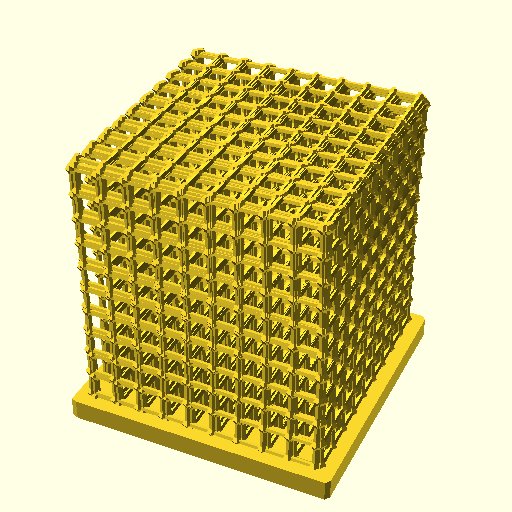

In [7]:
lattice1

In [8]:
with open("lattice1.scad", "w") as oh:
    oh.write(scad_render(lattice1))